In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


data = pd.read_csv('/content/order-dataset.csv', sep=';')
print(data.head())


data = data.dropna()


data['completed_at'] = pd.to_datetime(data['completed_at'])


data['hour'] = data['completed_at'].dt.hour
data['day'] = data['completed_at'].dt.day
data['month'] = data['completed_at'].dt.month
data['year'] = data['completed_at'].dt.year
data['dayofweek'] = data['completed_at'].dt.dayofweek
le = LabelEncoder()
data['operator_id'] = le.fit_transform(data['operator_id'])
X = data.drop(columns=['order_id', 'completed_at', 'operator_id'])
y = data['operator_id']

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




   order_id         completed_at  operator_id
0         1  2022-01-01 21:36:00   operator_5
1         2  2022-01-01 14:23:00  operator_11
2         3  2022-01-01 14:27:00  operator_11
3         4  2022-01-01 20:29:00  operator_15
4         5  2022-01-01 13:45:00  operator_11


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(data['operator_id'].unique()), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {accuracy}')




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.0684 - loss: 2.9772 - val_accuracy: 0.0875 - val_loss: 2.9405
Epoch 2/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.0943 - loss: 2.9274 - val_accuracy: 0.1011 - val_loss: 2.9068
Epoch 3/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.1021 - loss: 2.8974 - val_accuracy: 0.1046 - val_loss: 2.8817
Epoch 4/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.1110 - loss: 2.8688 - val_accuracy: 0.1114 - val_loss: 2.8625
Epoch 5/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1169 - loss: 2.8524 - val_accuracy: 0.1193 - val_loss: 2.8498
Epoch 6/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.1232 - loss: 2.8314 - val_accuracy: 0.1226 - val_loss: 2.8325
Epoch 7/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.1268 - loss: 2.8204 - val_accuracy: 0.1247 - val_loss: 2.8237
Epoch 8/10
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1307 - loss: 2

In [ ]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Build the model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')



Decision Tree Accuracy: 0.3211717162492294


In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Build the model
rf_model = RandomForestClassifier(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')




Random Forest Accuracy: 0.32130870567821185


In [ ]:


from sklearn.neighbors import KNeighborsClassifier

# Build the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')




KNN Accuracy: 0.31891139067101987


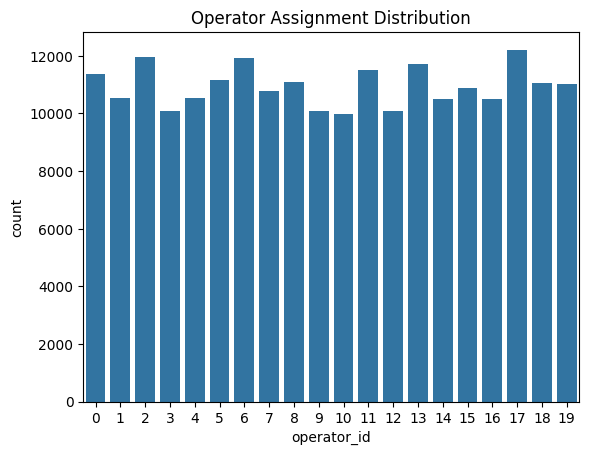

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Visualize operator assignment patterns
sns.countplot(x='operator_id', data=data)
plt.title('Operator Assignment Distribution')
plt.show()
